# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

### Packages and Libraries imported

>1. Numpy is imported for mathimatical anaylis.
>2. Pandas is imported to enable data manipulation.
>3. Matplotlib is imported to create static, animated, and interactive visualizations.
>4. Seaborn is imported to make statistical graphics of the dataset.
>5. Sklearn is imported as our machine learning library of choice. This is due to its versatility to be used for classification, regression, clustering and dimensionality reduction.
>6. Statsmodels is imported .... 

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Setting global constants to ensure notebook results are reproducible
###PARAMETER_CONSTANT = ###

In [3]:
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

### Dataset loaded from github repository

>The dataset for train and test is loaded from the teams github repository

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/pcf26536/TeamNM5/main/df_train.csv')
df_train.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [5]:
df_test = pd.read_csv('https://raw.githubusercontent.com/pcf26536/TeamNM5/main/df_test.csv')
df_test.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


## df_train dataset

>An indepth analysis is carried out on the train data, first looking at the shape of the dataset, then exploring the columns and carrying out other statistical analysis on the dataset.  

In [6]:
# look at dataset

df_train.shape

(8763, 49)

>>There are **49 columns** and **8763 rows** in the df_train data set. 

In [7]:
# look at data statistics
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000




>>Using the **describe()** function on the **df_train data set**, we are able to see a summary statistics. The mean, standard deviation and inter quartile range is given for each column. In the cell below, the **info()** function is ran on the dataframe, we can see the data type for each column and more. Take note that the **time, Valencia_wind_deg and Seville_pressure** columns are all object data type columns. 



In [8]:
# look at data statistics
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

>>Using the **isnull()** and **sum()** function, we count the null values for each column in the train set dataframe. We can see that only the **Valencia_pressure** column has **2068** null values.

In [9]:
# check for null values
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

>>When we isolate the **Valencia_pressure** column below, we confirm the that there are **NaN (Not a Number)** values in the column. We cannot feed our model NaN values, hence we must replace them with suitable values fit for our model. 

In [10]:
# summary stat on column with null value
df_train['Valencia_pressure']

0       1002.666667
1       1004.333333
2       1005.333333
3       1009.000000
4               NaN
           ...     
8758            NaN
8759    1021.000000
8760    1009.666667
8761    1020.000000
8762            NaN
Name: Valencia_pressure, Length: 8763, dtype: float64

## df_test dataset

>Unlike the train dataset, the focus of the test data set is essentially to clean it. We will look at the shape of the dataset, explore the columns, replace null values and encode all categorical values. 

In [13]:
# look at dataset shape

df_test.shape

(2920, 48)

>> The test dataset has **2920 rows** and **48 columns**. There are **48 columns** as against **49 columns** in the train data set because the target or dependent variable was not provided. Since the dataset is meant to test our model, this will not be a problem.  

In [14]:
# look at data statistics
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

>>Take note that, in the test data set the **Bilbao_snow_3h** column and **Valencia_snow_3h column** are both of **integer datatypes**. In the train data set, they are float data types. We will change them to float data types in order to ensure consistency. Also, **time, Valencia_wind_deg** and **Seville_pressure** are all of **object data types**.

In [15]:
# check for null values
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

>>As we can see, there are **454** Null values in the **Valencia_pressure** column. Upon closer inspection, we confirm that they are **NaN (Not a number)** values as we see below.

In [16]:
df_test['Valencia_pressure'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Valencia_pressure, dtype: float64

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### Train data set 

>>To prevent the loss of data, we determine the best value to replace the NaN values in the **Valencia_pressure** column. Since they are numeric continuous values, we determine the **mean, median** and **mode** of the data in the column and then identify the value best fits. 

In [36]:
# find the mean, median & mode of the Valencia_pressure column to determine 
# the best value to replace the null value  

print(df_train['Valencia_pressure'].mean())
print(df_train['Valencia_pressure'].median())
print(df_train['Valencia_pressure'].mode())

1012.0514065222828
1015.0
0    1018.0
dtype: float64


In [37]:
# replace null values with the mean of the column
df_train.Valencia_pressure.fillna(df_train['Valencia_pressure'].mean(), inplace=True)

>>Using the **fillna()** function above, we replace the NaN values in the Valencia_pressure column using the **mean** of the column. Below, we run the **isnull() and sum()** function on the Valencia_pressure column and we see that the NaN values have been replaced. We get an out of **0** showing that all the NaN values have been replaced.   

In [38]:
# check if null values have been replaced

df_train['Valencia_pressure'].isnull().sum()

0

>>Because most machine learning models cannot work with data that is not in numerical form, we have to encode all categrical data in our data set to numerical form for the model to be able to make predictions using them. Categorical data are represented as objects under datatype. We can see above when we ran the **info()** function on the dataframe that **Valencia_wind_deg, Seville_pressure and time** columns are object datatypes. This must be converted before our model can make use of them.  

In [39]:
df_train['Valencia_wind_deg'].head()

0     level_5
1    level_10
2     level_9
3     level_8
4     level_7
Name: Valencia_wind_deg, dtype: object

In [40]:
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)')

In [41]:
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].astype(float)

In [42]:
df_train['Valencia_wind_deg'].unique()

array([ 5., 10.,  9.,  8.,  7.,  6.,  4.,  3.,  1.,  2.])

>>In the above cells, we extracted the non numerals from each data entry on the said column. We then went ahead to change the datatype of the column to integer. The cell that follows confirms that the data has been encoded to a usable form by the model. This is similarly executed on the **Seville_pressure column**.      

In [43]:
df_train['Seville_pressure'].head()

0    sp25
1    sp25
2    sp25
3    sp25
4    sp25
Name: Seville_pressure, dtype: object

In [44]:
df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)')

In [45]:
df_train['Seville_pressure'] = df_train['Seville_pressure'].astype(float)

In [46]:
df_train['Seville_pressure'].unique()

array([25., 23., 24., 21., 16.,  9., 15., 19., 22., 11.,  8.,  4.,  6.,
       13., 17., 20., 18., 14., 12.,  5., 10.,  7.,  3.,  2.,  1.])

### Formatting time column
>> For the time column, we converted the datatype using pandas from object to pandas **datetime64**. This enables us create columns for **days**, **month**, **years** and **hours** based on the time column. Doing this, our model is able to  make better predictions as against using the time column the way it is.   

In [47]:
df_train['time'] = pd.to_datetime(df_train['time'])

In [48]:
df_train['Day'] = df_train['time'].dt.day

In [49]:
df_train['Month'] = df_train['time'].dt.month

In [50]:
df_train['Year'] = df_train['time'].dt.year

In [51]:
df_train['Hour'] = df_train['time'].dt.hour

In [52]:
df_train[['time', 'Day', 'Month', 'Year', 'Hour']].head()

,time,Day,Month,Year,Hour
0,2015-01-01 03:00:00,1,1,2015,3
1,2015-01-01 06:00:00,1,1,2015,6
2,2015-01-01 09:00:00,1,1,2015,9
3,2015-01-01 12:00:00,1,1,2015,12
4,2015-01-01 15:00:00,1,1,2015,15


>> The **time** column will be deleted since we have splitted it into four different column. Similarly, the **Unnamed** column will also be deleted seeing that it adds no value to our dataset. 

In [53]:
del df_train['time']

In [54]:
del df_train['Unnamed: 0']

## Merging similar columns
> In order to derive more meaning from our data and reduce computation time by our model, we will merge columns with related data to create new columns.

In [130]:
df_train_1 = df_train.copy()
df_train['Seville_pressure']

0       25.0
1       25.0
2       25.0
3       25.0
4       25.0
        ... 
8758    23.0
8759    23.0
8760    22.0
8761    23.0
8762    25.0
Name: Seville_pressure, Length: 8763, dtype: float64

In [297]:
df_train_1['Wind_speed'] = df_train['Barcelona_wind_speed'] + df_train['Bilbao_wind_speed'] + df_train['Madrid_wind_speed'] + df_train['Seville_wind_speed'] + df_train['Valencia_wind_speed']
df_train_1['Wind_deg'] = df_train['Barcelona_wind_deg'] + df_train['Bilbao_wind_deg'] + df_train['Valencia_wind_deg']
df_train_1['Rain_1h'] = df_train ['Barcelona_rain_1h'] + df_train['Bilbao_rain_1h'] + df_train['Madrid_rain_1h'] + df_train['Seville_rain_1h']
df_train_1['Rain_3h'] = df_train ['Barcelona_rain_1h'] + df_train['Seville_rain_3h']
df_train_1['Pressure'] = df_train['Barcelona_pressure'] + df_train['Bilbao_pressure'] + df_train['Madrid_pressure'] + df_train['Seville_pressure'] + df_train['Valencia_pressure']
df_train_1['Humidity'] = df_train['Madrid_humidity'] + df_train['Seville_humidity'] + df_train['Valencia_humidity']
df_train_1['Clouds_all'] = df_train['Bilbao_clouds_all'] + df_train['Madrid_clouds_all'] + df_train['Seville_clouds_all']
df_train_1['Weather_id'] = df_train['Barcelona_weather_id'] + df_train['Bilbao_weather_id'] + df_train['Madrid_weather_id'] + df_train['Seville_weather_id']
df_train_1['Temp'] = df_train['Barcelona_temp'] + df_train['Bilbao_temp'] + df_train['Madrid_temp'] + df_train['Seville_temp'] + df_train['Valencia_temp']
df_train_1['Temp_min'] = df_train['Barcelona_temp_min'] + df_train['Bilbao_temp_min'] + df_train['Madrid_temp_min'] + df_train['Seville_temp_min'] + df_train['Valencia_temp_min']
df_train_1['Temp_max'] = df_train['Barcelona_temp_max'] + df_train['Bilbao_temp_max'] + df_train['Madrid_temp_max'] + df_train['Seville_temp_max'] + df_train['Valencia_temp_max']
df_train_1[['Weather_id', 'Temp', 'Temp_min', 'Temp_max']].describe()

,Weather_id,Temp,Temp_min,Temp_max
count,8763.000000,8763.000000,8763.000000,8763.000000
mean,3038.888461,1449.268881,1442.168601,1457.480740
std,216.318319,36.003513,34.930174,37.665325
min,1982.666667,1360.432281,1355.416667,1360.432281
25%,2905.000000,1421.453833,1415.630385,1428.750000
50%,3127.666667,1445.846667,1439.003667,1454.083333
75%,3201.833333,1476.293333,1468.120000,1485.920000
max,3214.666667,1545.370000,1536.750000,1563.040000


In [298]:
df_train_merge = df_train_1[['Wind_speed', 'Wind_deg', 'Rain_1h', 'Rain_3h', 'Pressure', 'Humidity', 'Clouds_all', 'Weather_id', 'Temp', 'Temp_min', 'Temp_max', 'Day', 'Month', 'Year', 'Hour', 'load_shortfall_3h']]
df_train_merge.isnull().sum()

Wind_speed           0
Wind_deg             0
Rain_1h              0
Rain_3h              0
Pressure             0
Humidity             0
Clouds_all           0
Weather_id           0
Temp                 0
Temp_min             0
Temp_max             0
Day                  0
Month                0
Year                 0
Hour                 0
load_shortfall_3h    0
dtype: int64

### Checking for correlations

>Using the **corr()** function, we are able to check for correlations between different variables in our dataset. Going by Pearson's Coefficient Correlation, between **-0 & -1** indicates a negative correlatioin and between **0 & 1** indicates a positive correlation. Positive correlation imply that a change in one variable will cause a change in the correlated variable and vice versa to negatively correlated variables.

In [125]:
df_train_merge.corr()

,Wind_speed,Wind_deg,Rain_1h,Rain_3h,Pressure,Humidity,Clouds_all,Weather_id,Temp,Temp_min,Temp_max,Day,Month,Year,Hour,load_shortfall_3h
Wind_speed,1.000000,0.233281,0.212353,0.053426,0.021828,-0.262193,0.342227,-0.249671,0.110667,0.110464,0.100607,-0.021109,-0.242472,-0.058285,0.294160,-0.157644
Wind_deg,0.233281,1.000000,0.068390,-0.005302,0.025665,0.000236,0.122867,-0.042658,-0.097001,-0.095870,-0.098668,-0.000529,-0.121005,-0.182682,-0.046733,-0.171868
Rain_1h,0.212353,0.068390,1.000000,0.805581,0.063792,0.064724,0.299233,-0.592669,-0.062617,-0.055647,-0.070645,0.057061,-0.134813,-0.164120,0.046095,-0.122996
Rain_3h,0.053426,-0.005302,0.805581,1.000000,0.053455,-0.043985,0.035290,-0.258590,0.061031,0.046926,0.071456,0.024865,-0.029572,-0.071113,0.013128,-0.056826
Pressure,0.021828,0.025665,0.063792,0.053455,1.000000,0.018556,0.033493,-0.034153,-0.030804,-0.027467,-0.033826,0.015738,-0.033032,-0.030828,-0.009275,-0.034187
Humidity,-0.262193,0.000236,0.064724,-0.043985,0.018556,1.000000,0.329542,-0.265155,-0.722368,-0.726230,-0.692962,0.050525,-0.022469,-0.066792,-0.427846,-0.118548
Clouds_all,0.342227,0.122867,0.299233,0.035290,0.033493,0.329542,1.000000,-0.596429,-0.228930,-0.211687,-0.241156,0.035710,-0.191876,-0.094347,-0.009484,-0.147201
Weather_id,-0.249671,-0.042658,-0.592669,-0.258590,-0.034153,-0.265155,-0.596429,1.000000,0.195169,0.176990,0.209514,-0.035150,0.144363,0.118098,-0.004870,0.135499
Temp,0.110667,-0.097001,-0.062617,0.061031,-0.030804,-0.722368,-0.228930,0.195169,1.000000,0.986264,0.984565,-0.000068,0.219721,0.015616,0.293802,0.184345
Temp_min,0.110464,-0.095870,-0.055647,0.046926,-0.027467,-0.726230,-0.211687,0.176990,0.986264,1.000000,0.943946,0.007345,0.198571,0.027440,0.308836,0.194317


>>Below, we graphically plot the correlation between our variables on a heatmap. This helps us better digest the information we get from it our dataset. From the heatmap slider on the right, we can see that at the bottom right of our heatmap, there is a highly positive correlation in our data set. Similarly, in places where we have near black shades, we can interprete that there is a highly negative correlation.  

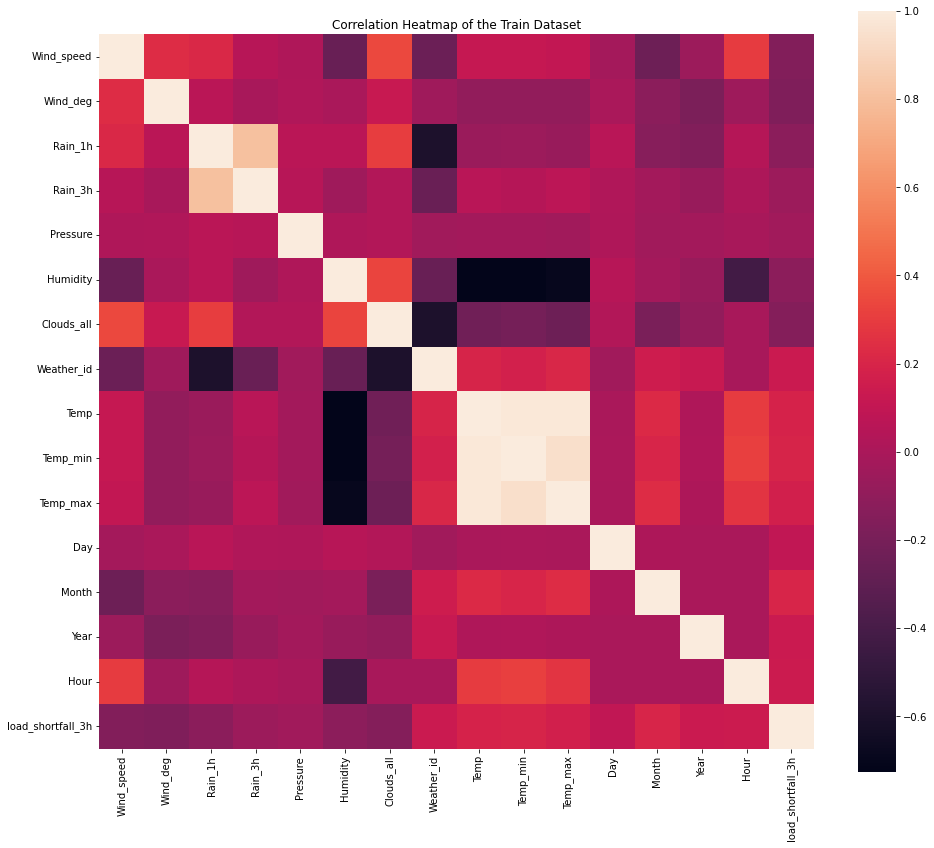

In [124]:
plt.figure(figsize=(16,14))
plt.title('Correlation Heatmap of the Train Dataset')
a = sns.heatmap(df_train_merge.corr(), square=True)
        
plt.show()

## Visualization (Graphical analysis)
#### Histogram & Density plot

> First thing is to import a few libraies, and in this session the two most powerful visualization libraries **seaborn** and **matplotlib** are needed which were already imported at the beginning of this notebook. **Histogram** and **Density plot** will be used to as our choice of graphical analysis. 







> In this case, **Histograms** will be considered because of the following:



> > * It helps to determine trends.<br>
> > * It makes picture clearer to read and to categorize data into many diverse classes.<br>
> > * Helps to improve decision-making process since it will be easier to view the data graphically.<br> 
> > * It helps to display the frequency of occurrences of data within an interval.<br>
> > * It helps regulate statistical information.<br>







array([[<AxesSubplot:title={'center':'Wind_speed'}>,
        <AxesSubplot:title={'center':'Wind_deg'}>,
        <AxesSubplot:title={'center':'Rain_1h'}>,
        <AxesSubplot:title={'center':'Rain_3h'}>],
       [<AxesSubplot:title={'center':'Pressure'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Clouds_all'}>,
        <AxesSubplot:title={'center':'Weather_id'}>],
       [<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'Temp_min'}>,
        <AxesSubplot:title={'center':'Temp_max'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>]], dtype=object)

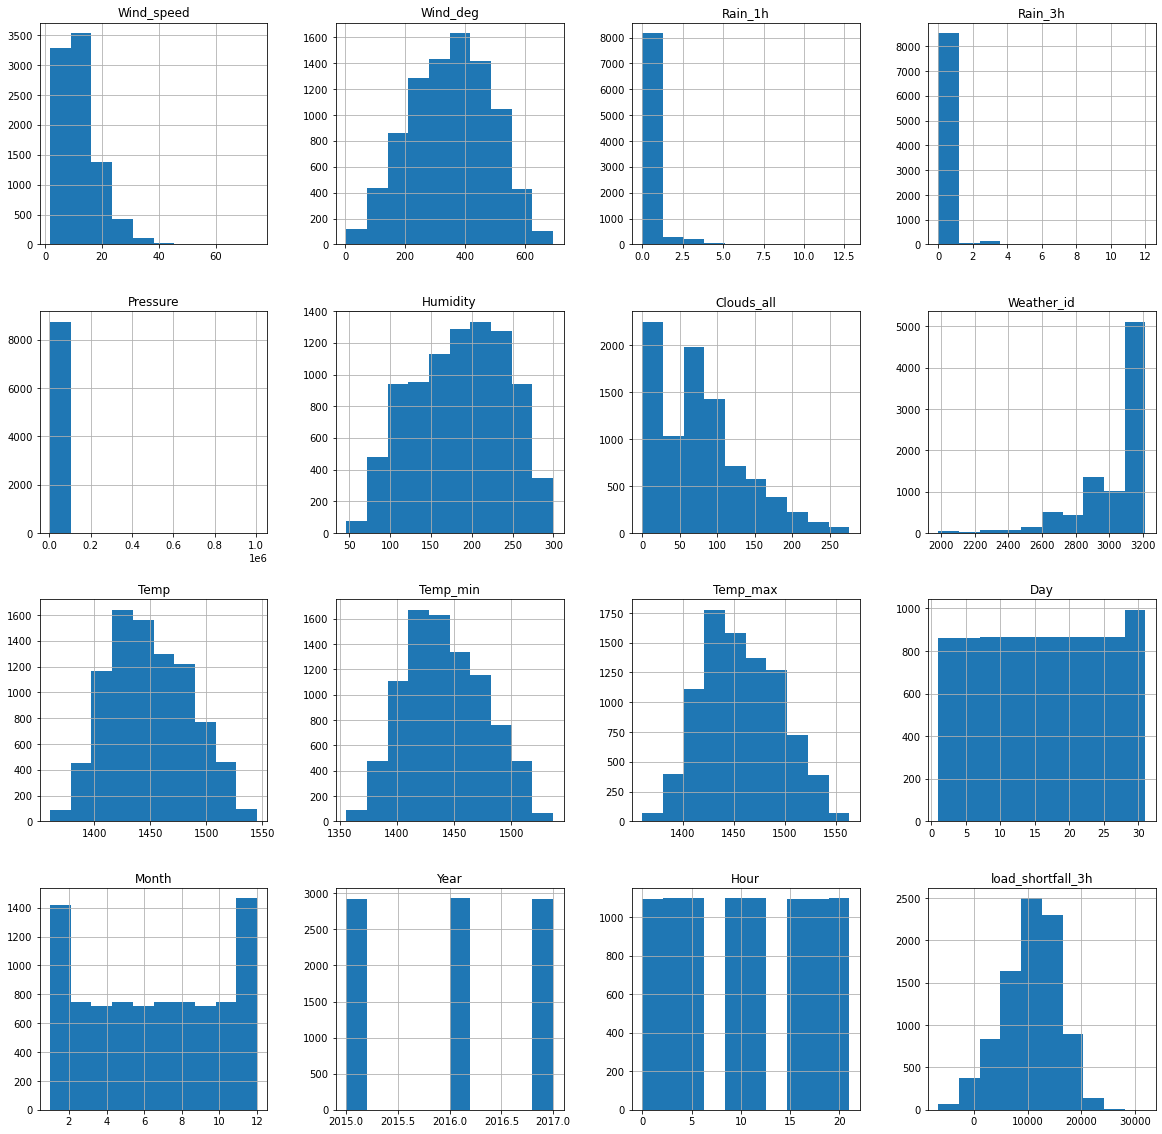

In [121]:
df_train_merge.hist(figsize=(20,20))

>> Above we have representation of the columns in the dataset in a histogram. We can see that ...

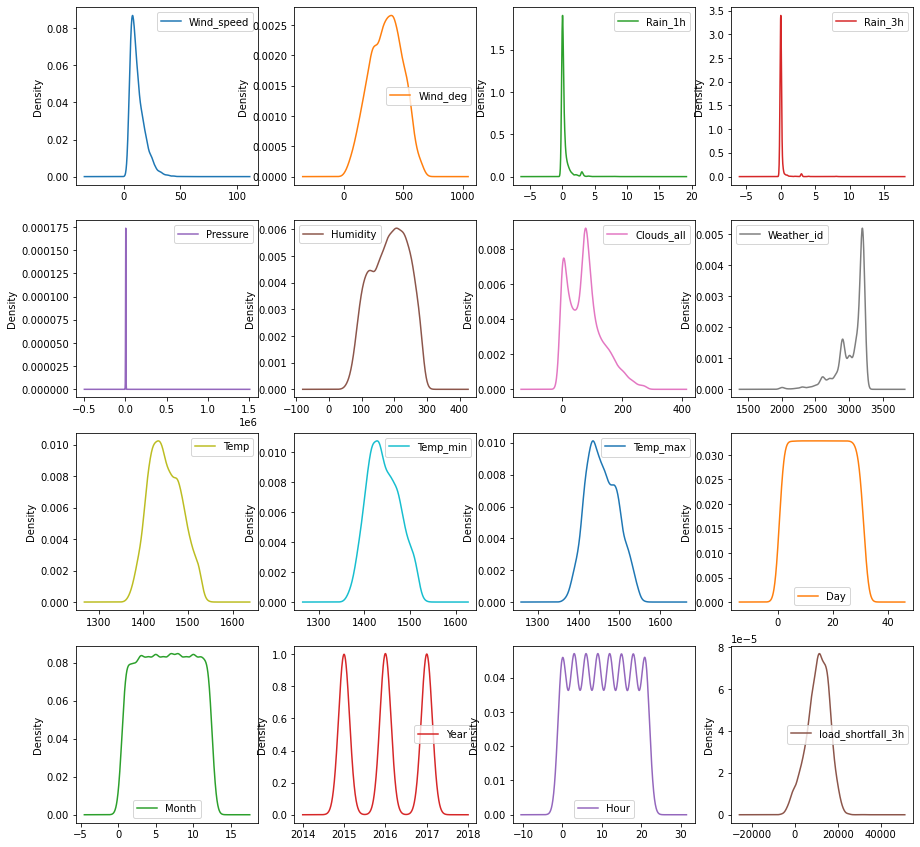

In [122]:
df_train_merge.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15,15));

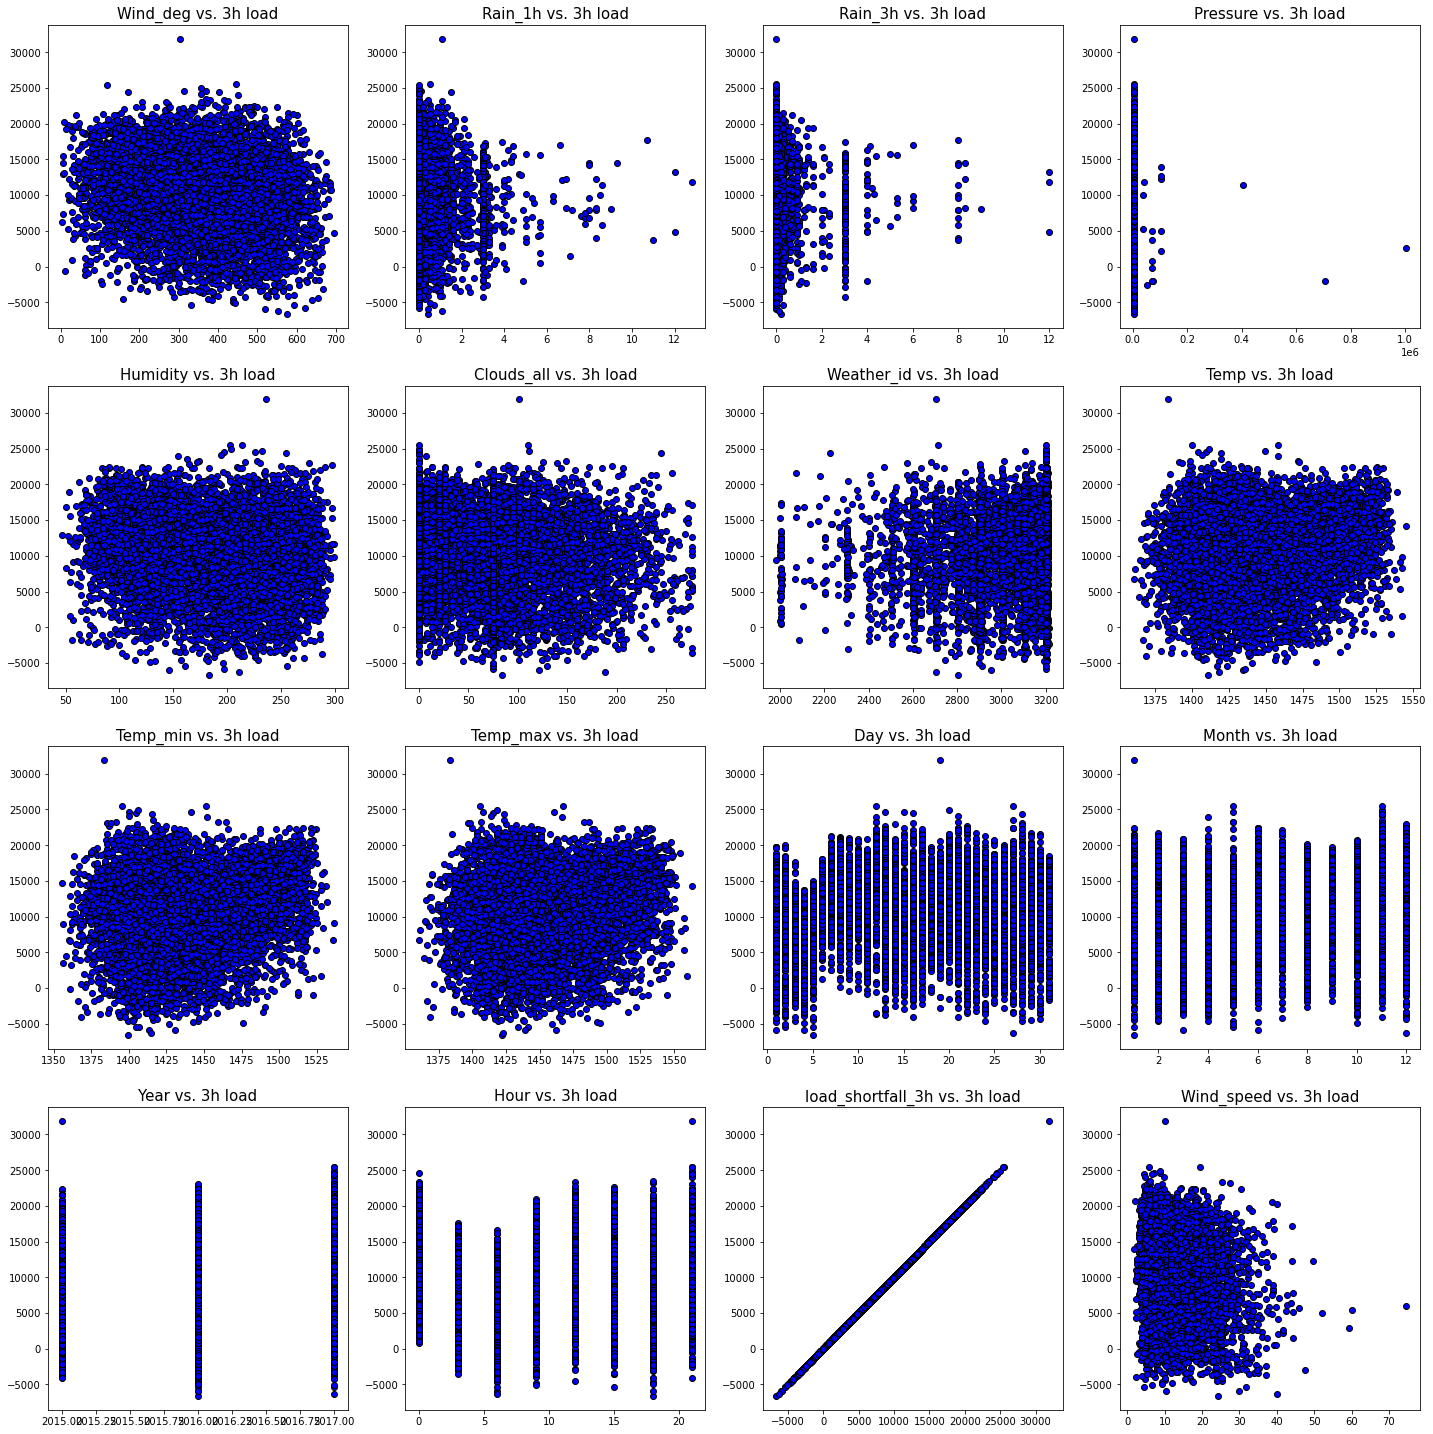

In [123]:
fig, axs = plt.subplots(4,4,figsize=(20,20))
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df_train_merge.columns):
    axs[index-1].set_title("{} vs. 3h load".format(column),fontsize=15)
    axs[index-1].scatter(x=df_train_merge[column],y=df_train_merge['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

### Test data set

>>To prevent the loss of data, we determine the best value to replace the NaN values in the **Valencia_pressure** column. Since they are numeric continuous values, we determine the **mean, median** and **mode** of the data in the column and then identify the value best fits. 

In [58]:
# find the mean, median & mode of the Valencia_pressure column to determine 
# the best value to replace the null value  

print(df_test['Valencia_pressure'].mean())
print(df_test['Valencia_pressure'].median())
print(df_test['Valencia_pressure'].mode())

1013.1483509056495
1014.6666666667
0    1016.0
dtype: float64


In [59]:
# replace null values with the mean of the column
df_test.Valencia_pressure.fillna(df_test['Valencia_pressure'].mean(), inplace=True)

>>Using the **fillna()** function above, we replace the NaN values in the Valencia_pressure column using the **mean** of the column. Below, we run the **isnull() and sum()** function on the Valencia_pressure column and we see that the NaN values have been replaced. We get an out of **0** showing that all the NaN values have been replaced.   

In [60]:
# check if null values have been replaced

df_test['Valencia_pressure'].isnull().sum()

0

>>While carrying out our EDA on the test data set, we observed that the **Bilbao_snow_3h** and the **Valencia_snow_3h** columns both had **integer data types** different from the float data types in the train dataset. As good practice, we will make them uniform for the train and test datasets.

In [61]:
df_test['Bilbao_snow_3h'] = df_test['Bilbao_snow_3h'].astype(float)

In [62]:
df_test['Valencia_snow_3h'] = df_test['Valencia_snow_3h'].astype(float)

>>Having changed the data types of the **Bilbao_snow_3h** and **Valencia_snow_3h** columns, when we inspect the **Valencia_wind_deg** column, we can see that data contained in it is not friendly to our model. In the cells that follow, we extract the non numerals from the data in the column and then convert the column data type to integer.

In [63]:
df_test['Valencia_wind_deg'].head() 

0    level_8
1    level_8
2    level_7
3    level_7
4    level_7
Name: Valencia_wind_deg, dtype: object

In [64]:
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')

In [65]:
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].astype(int)

In [66]:
df_test['Valencia_wind_deg'].head()

0    8
1    8
2    7
3    7
4    7
Name: Valencia_wind_deg, dtype: int64

>>Just as we have done with the **Valencia_wind_deg** column, we also extract the non numeral elements from the **Seville_pressure** column and then convert it the column data type to integer. 

In [67]:
df_test['Seville_pressure'].head()

0    sp25
1    sp25
2    sp25
3    sp25
4    sp25
Name: Seville_pressure, dtype: object

In [68]:
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)')

In [69]:
df_test['Seville_pressure'] = df_test['Seville_pressure'].astype(int)

In [70]:
df_test['Seville_pressure'].head()

0    25
1    25
2    25
3    25
4    25
Name: Seville_pressure, dtype: int64

>>For better predictions, our **time** column which is an object data types needs to converted. Using pandas datetime function, we will convert our time column. In the cells that follow, we will create four new columns from the time column as follows, **day, month, year** and **hour**. 

In [71]:
df_test['time'] = pd.to_datetime(df_test['time'])
df_test['time'].head()

0   2018-01-01 00:00:00
1   2018-01-01 03:00:00
2   2018-01-01 06:00:00
3   2018-01-01 09:00:00
4   2018-01-01 12:00:00
Name: time, dtype: datetime64[ns]

In [72]:
df_test['Day'] = df_test['time'].dt.day

In [73]:
df_test['Month'] = df_test['time'].dt.month

In [74]:
df_test['Year'] = df_test['time'].dt.year

In [75]:
df_test['Hour'] = df_test['time'].dt.hour

In [76]:
df_test[['time', 'Day', 'Month', 'Year', 'Hour']].head()

,time,Day,Month,Year,Hour
0,2018-01-01 00:00:00,1,1,2018,0
1,2018-01-01 03:00:00,1,1,2018,3
2,2018-01-01 06:00:00,1,1,2018,6
3,2018-01-01 09:00:00,1,1,2018,9
4,2018-01-01 12:00:00,1,1,2018,12


>> Since the **Unnamed** column is not adding any value to our dataset, we will delete. However we will not delete the **time** because we will need it when making our submission on kaggle.

In [77]:
del df_test['Unnamed: 0']

In [78]:
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Hour
0,2018-01-01 00:00:00,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,1,1,2018,0
1,2018-01-01 03:00:00,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,1,1,2018,3
2,2018-01-01 06:00:00,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,1,1,2018,6
3,2018-01-01 09:00:00,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,1,1,2018,9
4,2018-01-01 12:00:00,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,1,1,2018,12


## Merging similar columns
> In order to derive more meaning from our data and reduce computation time by our model, we will merge columns with related data to create new columns.

In [79]:
df_test_1 = df_test.copy()

In [299]:
df_test_1['Wind_speed'] = df_test['Barcelona_wind_speed'] + df_test['Bilbao_wind_speed'] + df_test['Madrid_wind_speed'] + df_test['Seville_wind_speed'] + df_test['Valencia_wind_speed']
df_test_1['Wind_deg'] = df_test['Barcelona_wind_deg'] + df_test['Bilbao_wind_deg'] + df_test['Valencia_wind_deg']
df_test_1['Rain_1h'] = df_test ['Barcelona_rain_1h'] + df_test['Bilbao_rain_1h'] + df_test['Madrid_rain_1h'] + df_test['Seville_rain_1h']
df_test_1['Rain_3h'] = df_test ['Barcelona_rain_1h'] + df_test['Seville_rain_3h']
df_test_1['Pressure'] = df_test['Barcelona_pressure'] + df_test['Bilbao_pressure'] + df_test['Madrid_pressure'] + df_test['Seville_pressure'] + df_test['Valencia_pressure']
df_test_1['Humidity'] = df_test['Madrid_humidity'] + df_test['Seville_humidity'] + df_test['Valencia_humidity']
df_test_1['Clouds_all'] = df_test['Bilbao_clouds_all'] + df_test['Madrid_clouds_all'] + df_test['Seville_clouds_all']
df_test_1['Weather_id'] = df_test['Barcelona_weather_id'] + df_test['Bilbao_weather_id'] + df_test['Madrid_weather_id'] + df_test['Seville_weather_id']
df_test_1['Temp'] = df_test['Barcelona_temp'] + df_test['Bilbao_temp'] + df_test['Madrid_temp'] + df_test['Seville_temp'] + df_test['Valencia_temp']
df_test_1['Temp_min'] = df_test['Barcelona_temp_min'] + df_test['Bilbao_temp_min'] + df_test['Madrid_temp_min'] + df_test['Seville_temp_min'] + df_test['Valencia_temp_min']
df_test_1['Temp_max'] = df_test['Barcelona_temp_max'] + df_test['Bilbao_temp_max'] + df_test['Madrid_temp_max'] + df_test['Seville_temp_max'] + df_test['Valencia_temp_max']
df_test_1[['Weather_id', 'Temp', 'Temp_min', 'Temp_max']].describe()

,Weather_id,Temp,Temp_min,Temp_max
count,2920.000000,2920.000000,2920.000000,2920.000000
mean,3028.558780,1446.427479,1442.133400,1451.096071
std,221.129198,36.025000,36.265063,35.477972
min,1863.888889,1361.173333,1356.750000,1366.083333
25%,2904.666667,1417.783333,1413.457917,1422.416667
50%,3111.166667,1442.646667,1438.416667,1447.416667
75%,3202.000000,1473.807500,1469.416667,1478.083333
max,3210.000000,1545.770000,1541.750000,1548.416667


In [326]:
df_test_merge = df_test_1[['time', 'Wind_speed', 'Wind_deg', 'Rain_1h', 'Rain_3h', 'Pressure', 'Humidity', 'Clouds_all', 'Weather_id', 'Temp', 'Temp_min', 'Temp_max', 'Day', 'Month', 'Year', 'Hour']]
df_test_merge.isnull().sum()

time          0
Wind_speed    0
Wind_deg      0
Rain_1h       0
Rain_3h       0
Pressure      0
Humidity      0
Clouds_all    0
Weather_id    0
Temp          0
Temp_min      0
Temp_max      0
Day           0
Month         0
Year          0
Hour          0
dtype: int64

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Linear Model

In [332]:
# split data
y = df_train_merge['load_shortfall_3h']
x = df_train_merge.drop('load_shortfall_3h', axis=1)

In [333]:
# create targets and features dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=False)

In [334]:
# create one or more ML models
lm = LinearRegression()

In [335]:
# Fit the model to the training data (also known as training the model)
lm.fit(x_train, y_train)

LinearRegression()

In [336]:
# create targets and features dataset
gen_y = lm.predict(x_train)
gen_y

array([7671.44152614, 7793.48423965, 7842.92055194, ..., 8488.3979776 ,
       9635.45424875, 7615.89645522])

In [337]:
# create one or more ML models
gen_y_test = lm.predict(x_test)
gen_y_test

array([ 8595.36067536,  7842.22777233,  9220.74646593, ...,
        9934.8057016 , 10716.44512124, 12626.59003121])

In [338]:
# evaluate one or more ML models
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

rmse(y_test, gen_y_test)

4894.4966215555205

In [339]:
r2_score(y_test, gen_y_test)

0.05573121583715834

### Lasso Model

In [424]:
from sklearn.preprocessing import StandardScaler 

In [425]:
# Create standardization object
scaler = StandardScaler()

In [426]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(x)

In [427]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [428]:
# Import LASSO module
from sklearn.linear_model import Lasso

# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

# Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [429]:
test_lasso = lasso.predict(X_test)

In [430]:
# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,test_lasso)))

RMSE: 4802.368085546933


In [431]:
r2_score(y_test, test_lasso)

0.030246531630292672

### Random Forest

In [432]:
# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


# Train test split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)

In [433]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=90, max_depth=29, random_state=23)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=29, n_estimators=90, random_state=23)

In [434]:
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3105.00132967916


In [435]:
r2_score(y_test, y_pred)

0.6319388050501947

### Saving our model in pickle file

In [443]:
import pickle

model_save_path = "3hr_load_shortfall_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(RF,file)

### Generating Prediction from df_test


In [436]:
#del df_test['time']

In [437]:
# split data
df_test_time = df_test_merge['time']
df_test_x = df_test_merge.drop('time', axis=1)

In [438]:
# scaling data set

X_scaled_test = scaler.fit_transform(df_test_x)
X_standardise_test = pd.DataFrame(X_scaled_test,columns=df_test_x.columns)
X_standardise_test.head()

,Wind_speed,Wind_deg,Rain_1h,Rain_3h,Pressure,Humidity,Clouds_all,Weather_id,Temp,Temp_min,Temp_max,Day,Month,Year,Hour
0,0.824729,0.238257,-0.533284,-0.291781,1.171810,0.193432,-1.124544,0.779955,-0.768139,-0.810379,-0.714539,-1.673503,-1.602745,0.0,-1.527525
1,0.987380,0.552795,-0.533284,-0.291781,1.301562,0.494647,-1.481042,0.419621,-1.005330,-1.031014,-0.987056,-1.673503,-1.602745,0.0,-1.091089
2,0.228342,0.413874,-0.533284,-0.291781,1.351466,0.494647,-1.362209,0.776939,-1.230212,-1.214878,-1.250175,-1.673503,-1.602745,0.0,-0.654654
3,0.716295,-0.451105,-0.533284,-0.291781,1.471237,0.500922,-0.886880,0.782970,-1.169503,-1.205684,-1.146807,-1.673503,-1.602745,0.0,-0.218218
4,2.613888,1.383700,-0.533284,-0.291781,1.401371,-0.452925,-1.005712,0.782970,-0.613220,-0.617322,-0.601774,-1.673503,-1.602745,0.0,0.218218


In [439]:
# Lasso, Ridge and Linear models 
preds_RF = RF.predict(X_standardise_test)
preds_lasso = lasso.predict(X_standardise_test)
preds_lm = lm.predict(df_test_x)

In [440]:
# Making predictions with Ridge model
preds_RF

array([ 9767.82962963,  1596.01111111,  1473.2       , ...,
       12069.83703704, 13799.28888889, 14520.4       ])

In [357]:
# Making predictions with Ridge model
preds_lasso

array([ 6980.92843978,  7062.04820095,  7925.86630071, ...,
       12437.98048927, 13065.18839314, 12304.9748671 ])

In [358]:
# Making predictions with Linear model
preds_lm

array([ 7714.98197593,  7788.71153744,  8625.22436684, ...,
       13299.0923755 , 13924.01484914, 13076.26220668])

### Submission file

In [421]:
df_preds = pd.DataFrame(preds_RF, columns=['load_shortfall_3h'])
df_preds.head()

,load_shortfall_3h
0,9767.829630
1,1596.011111
2,1473.200000
3,3053.059259
4,4087.212963


In [422]:
df_test_time.head()

0   2018-01-01 00:00:00
1   2018-01-01 03:00:00
2   2018-01-01 06:00:00
3   2018-01-01 09:00:00
4   2018-01-01 12:00:00
Name: time, dtype: datetime64[ns]

In [423]:
output = pd.DataFrame({'time':df_test_time})
submission = output.join(df_preds)
submission.to_csv('submission_RF.csv', index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic